In [1]:
import numpy as np
import matplotlib.pyplot as plt

from toygrad import MLP, Layer, Sigmoid, SoftMax, ReLU, TanH, Linear, SquaredError, CategoricalCrossEntropy, Accuracy
from plot import plot_network, plot_metric

np.random.seed(2137)
plt.rcParams["figure.figsize"] = (20,20)

TRAINING_DATASET = "data/mnist/train.csv"
TESTING_DATASET = "data/mnist/test.csv"

def one_hot(y):
    y = y.astype(int)
    encoded = np.zeros((y.size, y.max()+1))
    encoded[np.arange(y.size), y.reshape(1, -1)] = 1
    return encoded

def read_mnist(path):
    """Read and shuffle the dataset"""
    data = np.genfromtxt(path, delimiter=',')[1:]
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = one_hot(data[:, 0].reshape(-1, 1))
    return X, Y

def plot_images(X):
    # Disregard elements which would not fit in square
    size = int(len(X)**(1/2))
    x = X[:size**2]
    plt.imshow(np.concatenate(x.reshape(size, size*28, 28), axis=1))
    plt.show()
    
X, Y = read_mnist(TRAINING_DATASET)
X = (X-np.mean(X))/np.std(X)

train_size = int(len(X)*0.8)

X_train, Y_train = X[:train_size], Y[:train_size]
X_test, Y_test = X[train_size:], Y[train_size:]

In [4]:
layers = [
    Layer(in_size=28*28, out_size=64, activ_function=TanH),
    Layer(in_size=64, out_size=10, activ_function=SoftMax),
]
m = MLP(
    layers=layers,
    loss=CategoricalCrossEntropy,
    metrics=[Accuracy],
    bias=True,
    batch_size=4,
    epochs=10,
    momentum=0,
    learning_rate=0.1,
    verbosity=2,
)

Epoch    1
 Accuracy_train: 0.490
 Accuracy_test: 0.692
 CategoricalCrossEntropy_train: 0.179
 CategoricalCrossEntropy_train_std: 0.720
 CategoricalCrossEntropy_test: 0.119
 CategoricalCrossEntropy_test_std: 0.774
Epoch    2
 Accuracy_train: 0.720
 Accuracy_test: 0.751
 CategoricalCrossEntropy_train: 0.128
 CategoricalCrossEntropy_train_std: 0.638
 CategoricalCrossEntropy_test: 0.129
 CategoricalCrossEntropy_test_std: 1.019
Epoch    3
 Accuracy_train: 0.771
 Accuracy_test: 0.784
 CategoricalCrossEntropy_train: 0.125
 CategoricalCrossEntropy_train_std: 0.662
 CategoricalCrossEntropy_test: 0.120
 CategoricalCrossEntropy_test_std: 1.033
Epoch    4
 Accuracy_train: 0.793
 Accuracy_test: 0.804
 CategoricalCrossEntropy_train: 0.129
 CategoricalCrossEntropy_train_std: 0.701
 CategoricalCrossEntropy_test: 0.125
 CategoricalCrossEntropy_test_std: 1.189
Epoch    5
 Accuracy_train: 0.806
 Accuracy_test: 0.813
 CategoricalCrossEntropy_train: 0.125
 CategoricalCrossEntropy_train_std: 0.688
 Categor

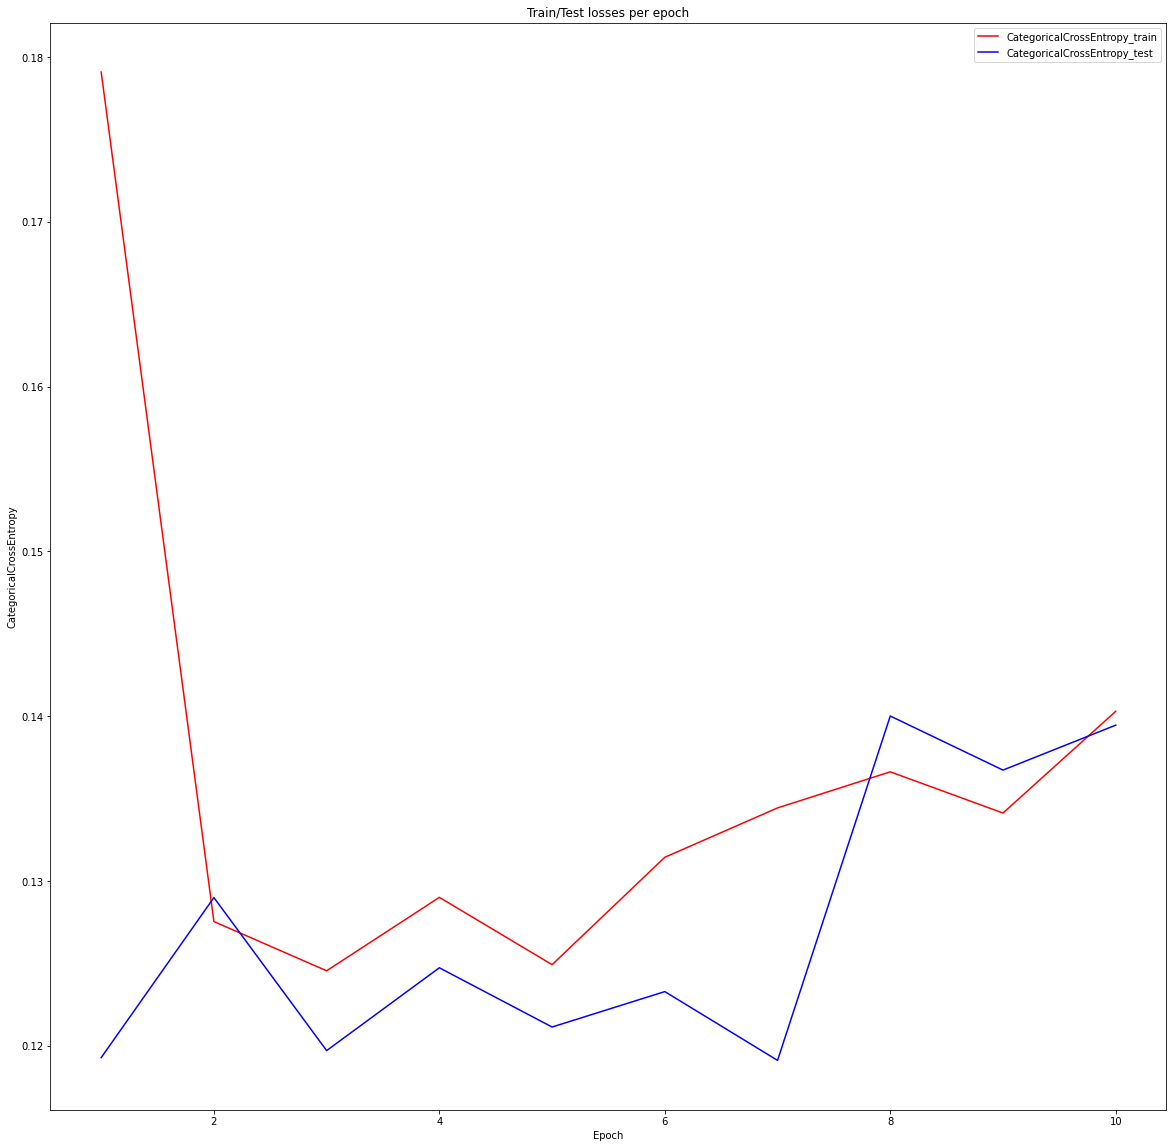

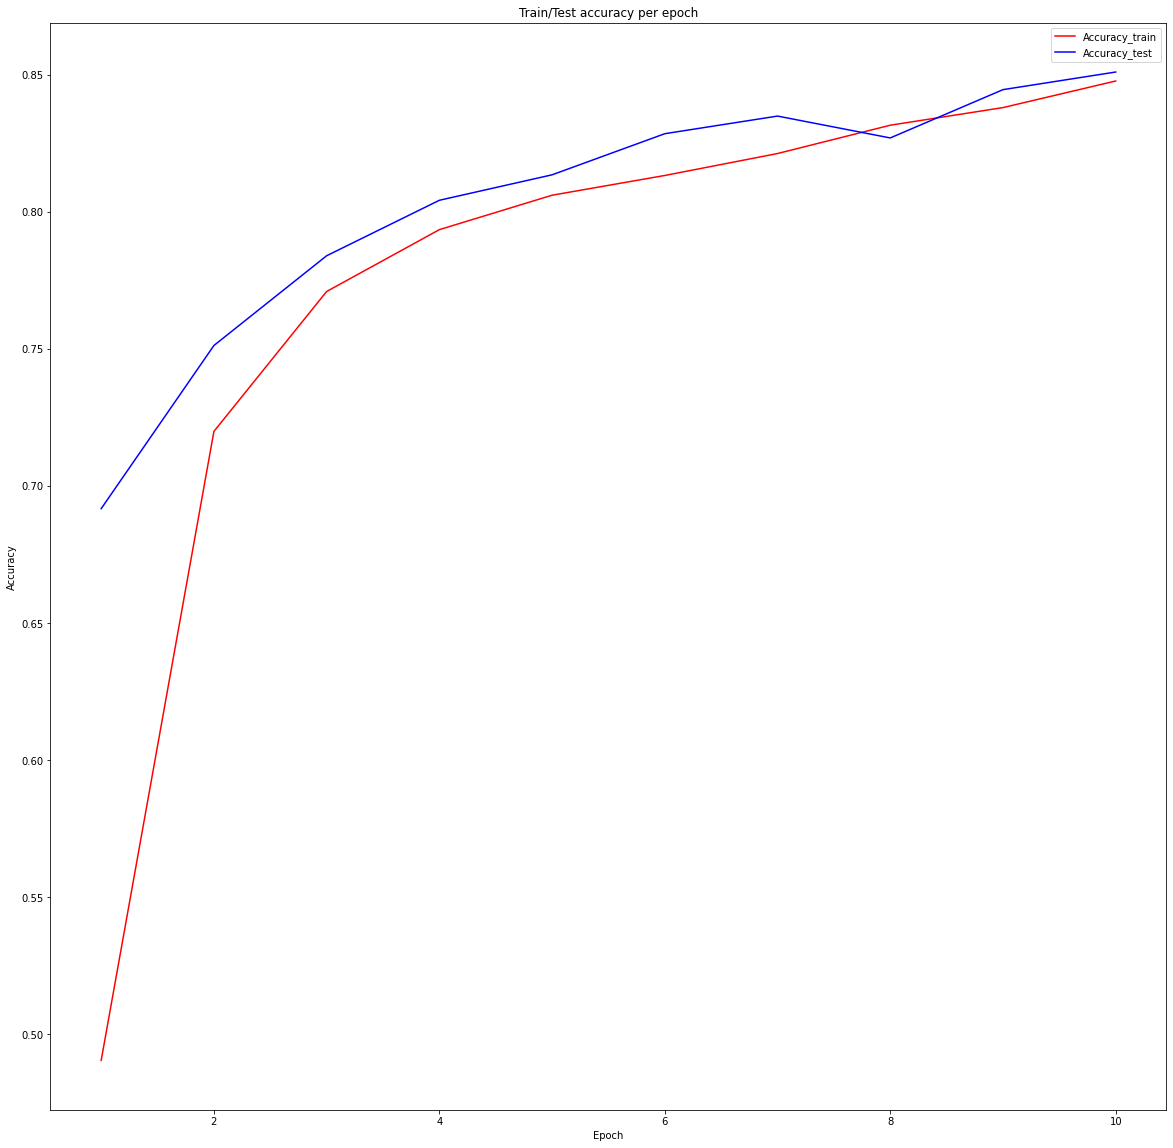

CPU times: user 8min 41s, sys: 18min 30s, total: 27min 12s
Wall time: 3min 32s


In [5]:
%%time
stats = m.train(X_train, Y_train, X_test, Y_test)
plot_metric(m.loss, stats, title="Train/Test losses per epoch")
plot_metric(Accuracy(), stats, title="Train/Test accuracy per epoch")

In [2]:
activations = [TanH, Sigmoid, ReLU]
layer_sizes = [32, 64, 128]
layer_numbers = [1, 2, 3]
learning_rates = [0.1, 0.01, 0.001]

Layer number: 1, Layer size: 32, Activation: TanH, Learning rate: 0.1
Epoch   10
 Accuracy_train: 0.795
 Accuracy_test: 0.790
 CategoricalCrossEntropy_train: 0.076
 CategoricalCrossEntropy_train_std: 0.364
 CategoricalCrossEntropy_test: 0.078
 CategoricalCrossEntropy_test_std: 0.554


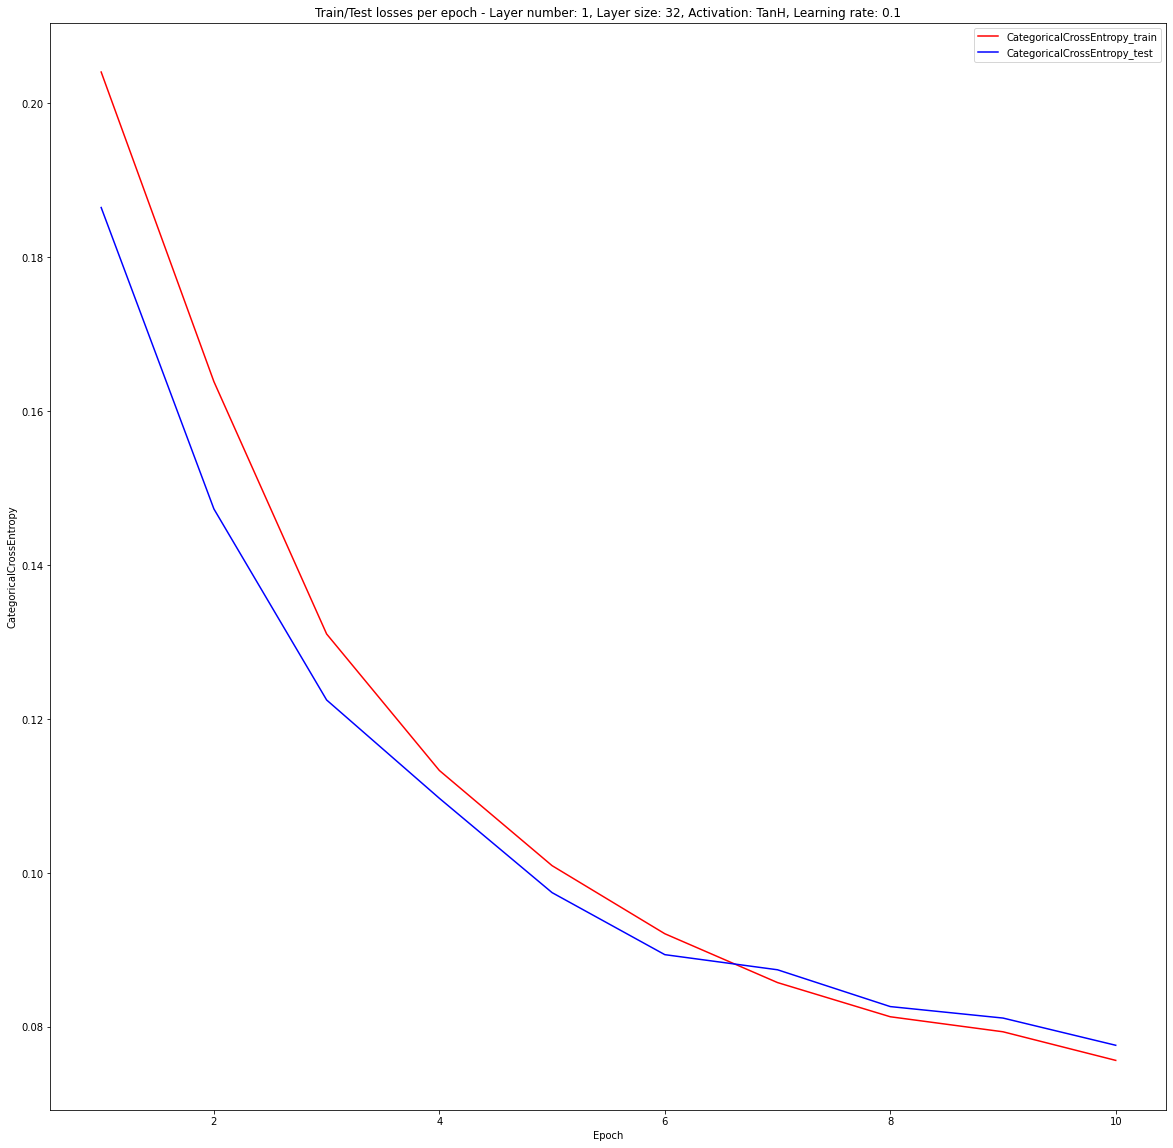

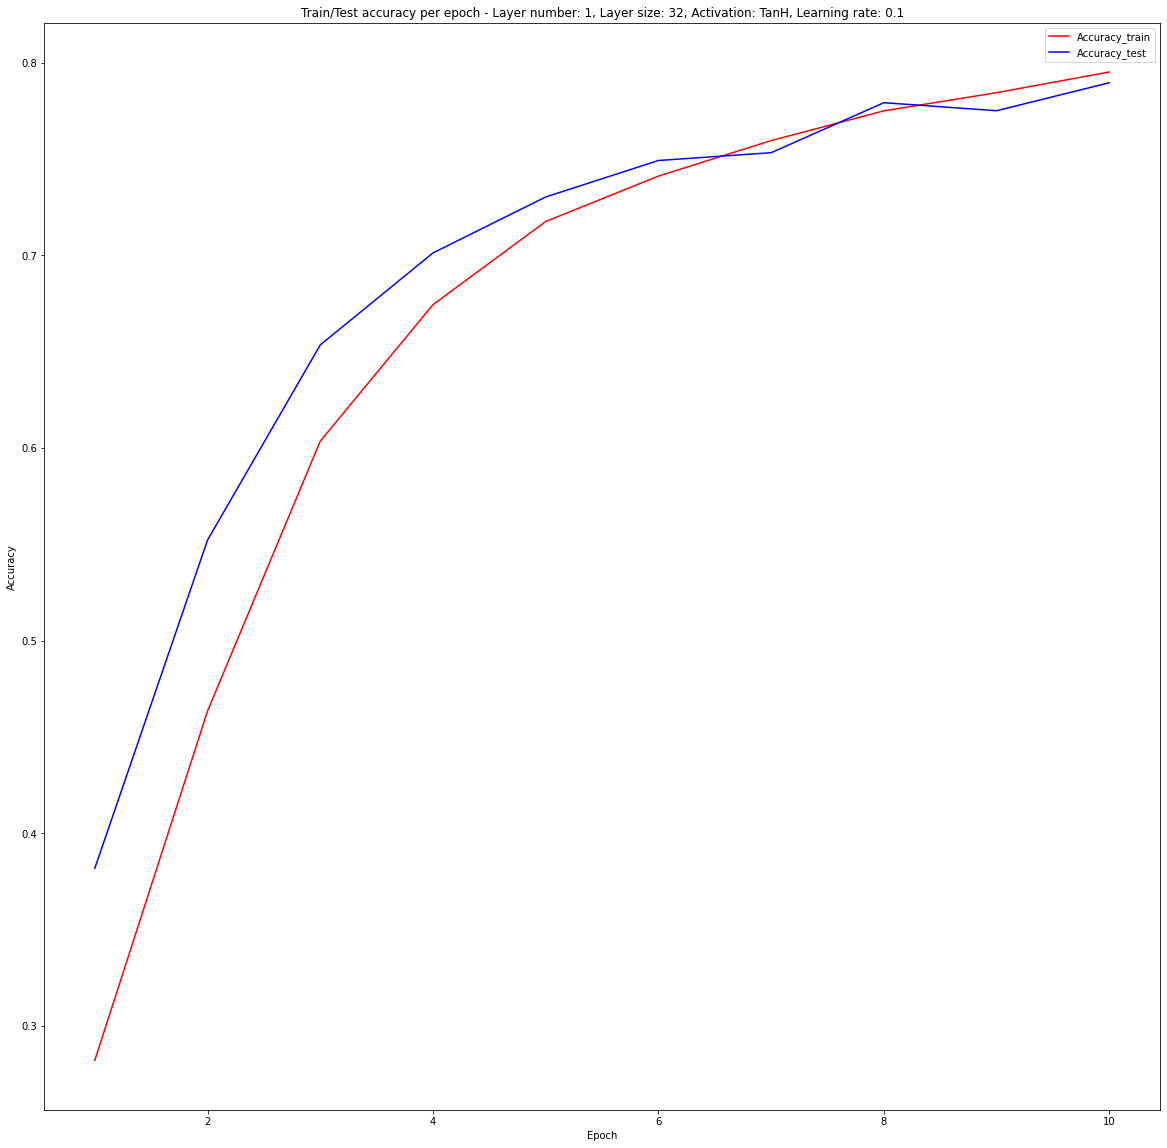

Layer number: 1, Layer size: 32, Activation: TanH, Learning rate: 0.01


In [ ]:
for activation in activations:
    for size in layer_sizes:
        for layer_num in layer_numbers:
            for lr in learning_rates:
                print("===================================================================================")
                header = f"Layer number: {layer_num}, Layer size: {size}, Activation: {str(activation())}, Learning rate: {lr}"
                print(header)
                print("===================================================================================")
                layers = [
                    Layer(in_size=28*28, out_size=size, activ_function=activation),
                    *[Layer(in_size=size, out_size=size, activ_function=activation) for _ in range(layer_num-1)],
                    Layer(in_size=size, out_size=10, activ_function=SoftMax),
                ]
                m = MLP(
                    layers=layers,
                    loss=CategoricalCrossEntropy,
                    metrics=[Accuracy],
                    bias=True,
                    batch_size=4,
                    epochs=10,
                    momentum=0,
                    learning_rate=lr,
                    verbosity=1,
                )
                stats = m.train(X_train, Y_train, X_test, Y_test)
                plot_metric(m.loss, stats, title=f"Train/Test losses per epoch - {header}")
                plot_metric(Accuracy(), stats, title=f"Train/Test accuracy per epoch - {header}")